In [92]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs


In [93]:
data=pandas.read_csv('HRA.csv')


In [94]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [95]:
left = data.groupby('left')



In [132]:
print(data.describe())

X=data['left']



       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

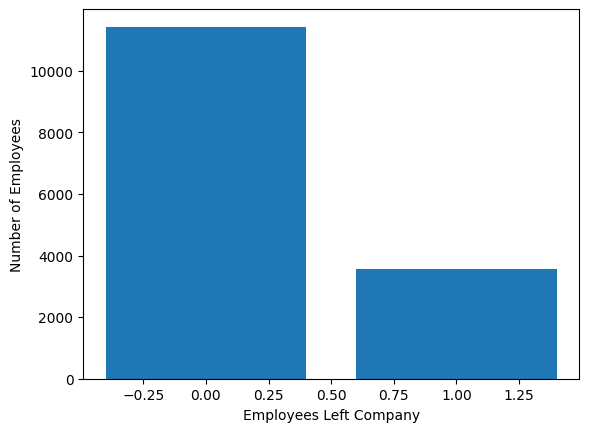

left
0    11428
1     3571
Name: count, dtype: int64

In [97]:

left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()
data.left.value_counts()



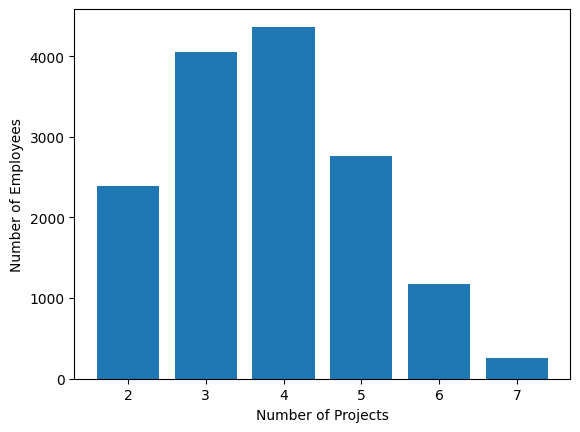

In [98]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


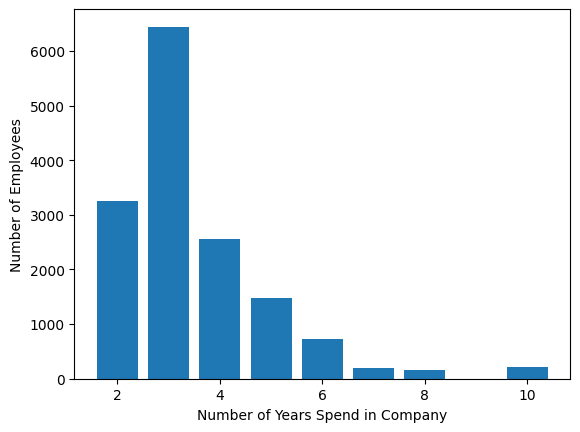

In [99]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()


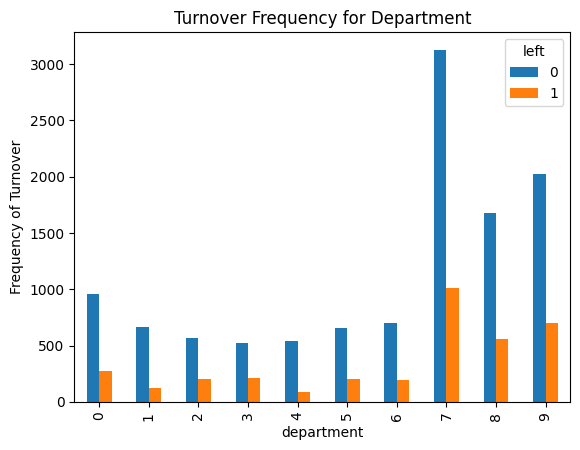

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
pandas.crosstab(data.sales,data.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

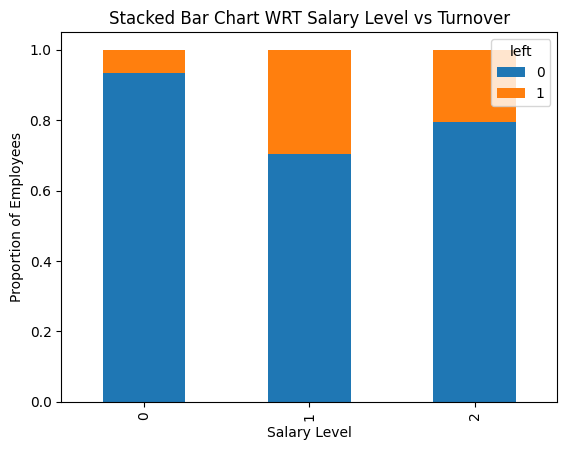

In [121]:
table=pandas.crosstab(data.salary, data.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart WRT Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

C:\Users\madha\AppData\Local\Temp\ipykernel_2192\3670380088.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 2, i+1)


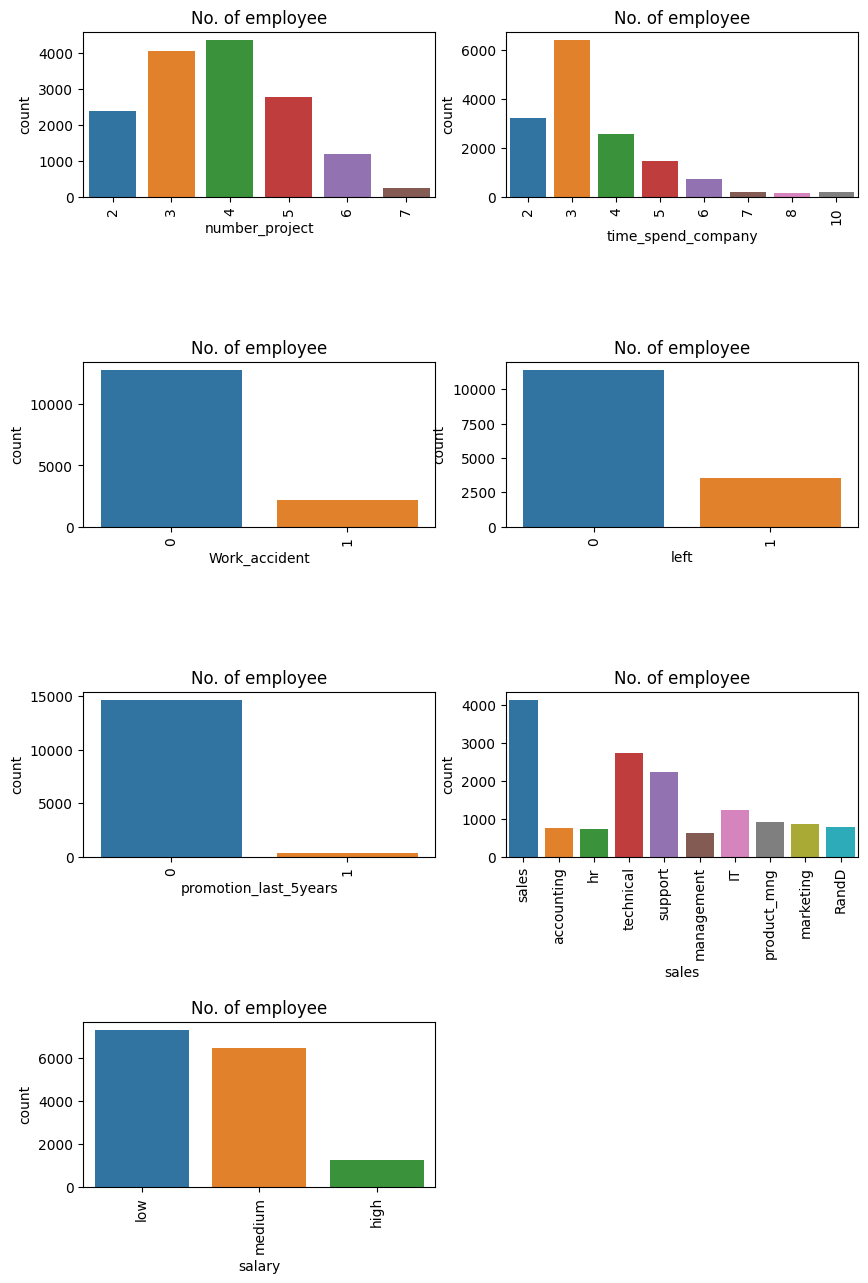

In [100]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


Text(0.5, 0.92, '3D Plot')

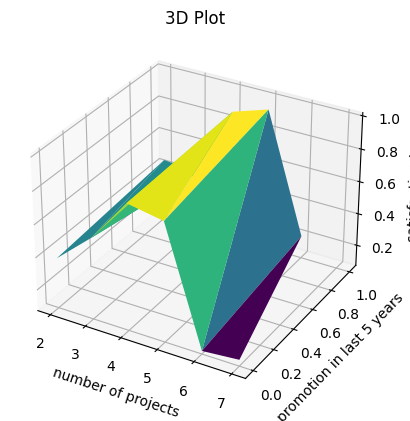

In [101]:
from mpl_toolkits.mplot3d import Axes3D
sourceid_data1 = data['number_project']
hod_data1 = data['promotion_last_5years']
count_data1 = data['satisfaction_level']
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_trisurf(sourceid_data1, hod_data1, count_data1, cmap='viridis', edgecolor='none')
ax1.set_xlabel('number of projects')
ax1.set_ylabel('promotion in last 5 years')
ax1.set_zlabel('satisfaction level')
ax1.set_title('3D Plot')

In [102]:
#CLUSTERING

c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

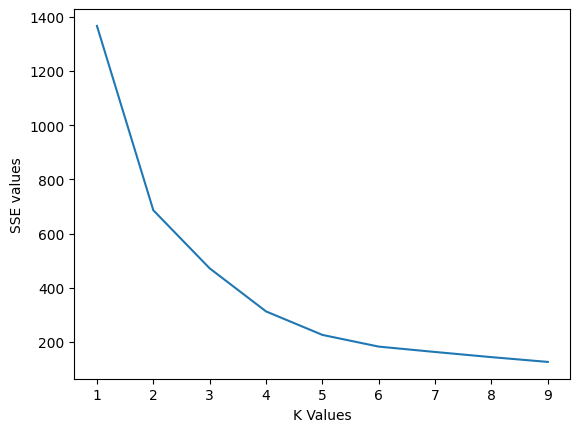

In [103]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(data[['last_evaluation','satisfaction_level']])
    sse.append(km.inertia_)
plt.xlabel('K Values')
plt.ylabel('SSE values')
plt.plot(k_rng,sse)

In [104]:

# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 4, random_state = 0).fit(left_emp)


c:\Users\madha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


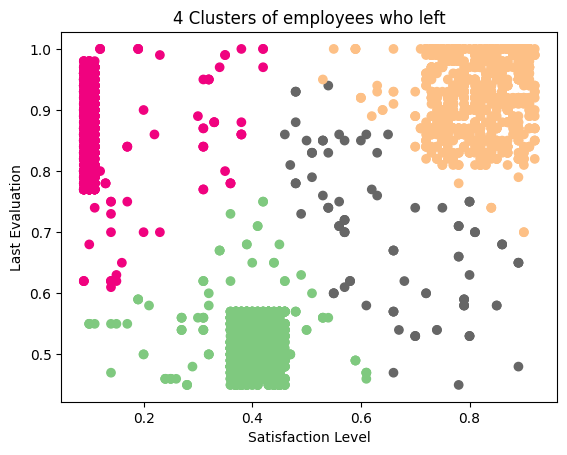

In [105]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('4 Clusters of employees who left')
plt.show()


In [106]:
#PREDICTION MODEL

In [107]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['sales']=le.fit_transform(data['sales'])


In [108]:

X=data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary']]
y=data['left']


In [109]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 70% training and 30% test


In [110]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)


In [111]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9733333333333334
Precision: 0.9616519174041298
Recall: 0.9235127478753541


In [112]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

In [113]:
dftest = adfuller(data['left'], autolag='AIC')
print("P value:", dftest[1])

P value: 0.15684414942525637


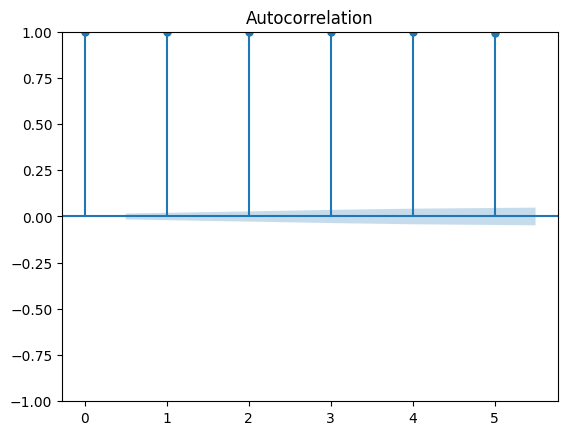

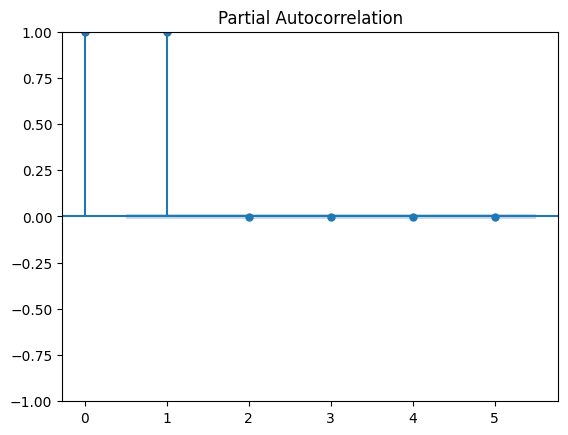

In [114]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data['left'], lags=5)
pacf = plot_pacf(data['left'], lags= 5)

In [115]:
train = X[:len(X)-4]
test = X[len(X)-4:]


# Split the data into train and test sets
train = data['left'][:len(X)-450] 
test = data['left'][-450:]  

# Convert the train and test data to a numeric type
train = pandas.to_numeric(train, errors='coerce')
test = pandas.to_numeric(test, errors='coerce')

# Remove any NaN values from the train and test datatrain = train.dropna()
test = test.dropna()
leng_train = len(train)
# Specify the number of lags (adjust this value as needed)
lag =1
# Ensure that lags is less than nobs_train
if lag >= leng_train:
    raise ValueError("Number of lags should be less than the number of observations.")

# Fit the AutoReg model
model = AutoReg(train, lags = lag).fit()

# Make predictions
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Print the predictions
print(predictions)
print(data['left'])

14549    0.999359
14550    0.998718
14551    0.998078
14552    0.997439
14553    0.996800
           ...   
14994    0.760271
14995    0.759826
14996    0.759381
14997    0.758936
14998    0.758492
Length: 450, dtype: float64
0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [116]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print (rmse)

0.14605495720571435


In [122]:
#Random Forest Model

In [125]:


from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier(
    class_weight="balanced")

# Fit the RF Model
rf = rf.fit(X_train, y_train)
from sklearn import model_selection

In [128]:


# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
scoring = 'roc_auc'
rf_results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
rf_results

array([0.99074855, 0.99457339, 0.99020367, 0.9974376 , 0.99163807,
       0.98971956, 0.99319712, 0.98999324, 0.99350985, 0.99820181])

In [130]:

rf_auc = rf_results.mean()
print("The Random Forest AUC: %.3f and the STD is (%.3f)" % (rf_auc, rf_results.std()))

The Random Forest AUC: 0.993 and the STD is (0.003)


In [129]:
feature_importances = pandas.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,satisfaction_level,0.306644
1,time_spend_company,0.223275
2,average_montly_hours,0.167015
3,number_project,0.142604
4,last_evaluation,0.128749
5,sales,0.016001
6,salary,0.008699
7,Work_accident,0.005923
8,promotion_last_5years,0.001088
